# ATLAS analysis 
[ATL-PHYS-PUB-2019-029](http://cds.cern.ch/record/2684863)
[arXiv:1908.03122](https://arxiv.org/abs/1908.03122)
[HistFactory likelihood (HEPData)](https://www.hepdata.net/record/ins1748602)

## Initialize

In [1]:
import sys
sys.dont_write_bytecode = True
sys.path.append('../DNNLikelihood_dev/source')
import DNNLikelihood
#from DNNLikelihood import set_resources
#active_gpus = set_resources.set_gpus(None)
#from DNNLikelihood import utils
#from DNNLikelihood import inference
from timeit import default_timer as timer
from jupyterthemes import jtplot
jtplot.reset()

#from os import listdir
#from os.path import isfile, join
#import json, jsonpatch, requests, jsonschema
#from jsonpatch import JsonPatch
#import h5py
#import os
#import sys
#import ipywidgets as widgets
#from multiprocess import Pool
#import psutil
#from scipy import stats
#from scipy import optimize
## insert at 1, 0 is the script path (or '' in REPL)
#sys.path.insert(0,'pyhf/src')
#import pyhf
#import numpy as np
#import emcee
#from timeit import default_timer as timer
#import matplotlib.pyplot as plt
#%matplotlib inline
#from jupyterthemes import jtplot
#
#from multiprocessing import Pool

In [69]:
#from tensorboard import notebook

In [189]:
#import toy_likelihood
#from toy_likelihood import *

## Histfactory

In [2]:
histfact = DNNLikelihood.Histfactory(workspace_folder="HEPData_workspaces",
                                     name = "ATLAS_sbottom_search",
                                     output_folder = "tutorials")

Successfully imported 649 likelihoods from 3 regions.
Histfactory pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\ATLAS_sbottom_search_histfactory.pickle saved in 0.0020822999999996483 s.
Histfactory json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\ATLAS_sbottom_search_histfactory.json saved in 0.0013174000000004682 s.
Histfactory log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\ATLAS_sbottom_search_histfactory.log saved in 0.0022202999999993978 s.


In [3]:
histfact = DNNLikelihood.Histfactory(histfactory_input_file="tutorials/ATLAS_sbottom_search_histfactory")

Likelihoods loaded in 0.0075563000000009595 seconds.
File size is  157747 .
Histfactory log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\ATLAS_sbottom_search_histfactory.log saved in 0.0024151000000003364 s.


In [4]:
histfact.likelihoods_dict[0]

{'signal_region': 'A',
 'bg_only_file': 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\ATLAS\\HEPData_workspaces\\RegionA\\BkgOnly.json',
 'patch_file': 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\ATLAS\\HEPData_workspaces\\RegionA\\patch.sbottom_1000_131_1.json',
 'name': 'ATLAS_sbottom_search_histfactory_0_region_A_patch_sbottom_1000_131_1_likelihood',
 'model_loaded': False}

In [5]:
histfact.import_histfactory(lik_numbers_list=[0])

C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\HEPData_workspaces\RegionA\patch.sbottom_1000_131_1.json processed in 0.9326595999999991 s.
Histfactory log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\ATLAS_sbottom_search_histfactory.log saved in 0.0026036999999998756 s.
Imported 1 likelihoods in  0.9328158000000002 s.


In [6]:
histfact.likelihoods_dict[0]

{'signal_region': 'A',
 'bg_only_file': 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\ATLAS\\HEPData_workspaces\\RegionA\\BkgOnly.json',
 'patch_file': 'C:\\Users\\Admin\\Dropbox\\Work\\09_Resources\\Git\\GitHub\\DNNLikelihood\\ATLAS\\HEPData_workspaces\\RegionA\\patch.sbottom_1000_131_1.json',
 'name': 'ATLAS_sbottom_search_histfactory_0_region_A_patch_sbottom_1000_131_1_likelihood',
 'model_loaded': True,
 'model': <pyhf.pdf.Model at 0x1ea62b48e48>,
 'obs_data': array([153.,  52.,  19.,  12.,   3.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.]),
 'pars_init': array([1., 1., 1., 1.,

In [7]:
histfact.save_histfactory()

Histfactory pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\ATLAS_sbottom_search_histfactory.pickle saved in 0.006640400000000213 s.
Histfactory json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\ATLAS_sbottom_search_histfactory.json saved in 0.0009577000000007274 s.
Histfactory log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\ATLAS_sbottom_search_histfactory.log saved in 0.0037561999999997653 s.


In [8]:
likelihood_0 = histfact.get_likelihood_object(lik_number=0)

Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\ATLAS_sbottom_search_0_region_A_patch_sbottom_1000_131_1_likelihood.pickle saved in 0.14166789999999985 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\ATLAS_sbottom_search_0_region_A_patch_sbottom_1000_131_1_likelihood.json saved in 0.002614499999999964 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\ATLAS_sbottom_search_0_region_A_patch_sbottom_1000_131_1_likelihood.log saved in 0.0008436999999972272 s.
Likelihood object for likelihood 0 created and saved to files C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\ATLAS_sbottom_search_0_region_A_patch_sbottom_1000_131_1_likelihood.json and C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\ATLAS_sbottom_search_0_region_A_patch_sbottom_1000_131_1_likelihood.

## Likelihood

In [9]:
import numpy as np

In [10]:
nbI_nominal = np.array(list(reversed([i for i in range(100,1100,100)])))
nbI_obs = np.random.poisson(nbI_nominal)
nsI_reference = np.array(list(reversed([i for i in range(10,110,10)])))
[len(nbI_nominal),len(nbI_obs),len(nsI_reference)]

[10, 10, 10]

In [11]:
def nbI(delta):
    delta = np.array(delta)
    return np.array([nbI_nominal[i]*(1+0.1)**delta[i] for i in range(len(delta))])
def nsI(mu):
    return mu*nsI_reference
def nI(pars):
    mu = pars[0]
    delta = pars[1:]
    return np.array(nsI(mu)+nbI(delta))
def loglik(pars, obs):
    exp = nI(pars)
    logfact = np.array(list(map(lambda x: np.math.lgamma(x+1), obs)))
    return np.sum(-1*logfact+obs*np.log(exp)-exp)
def logprior(pars):
    mu = pars[0]
    delta = pars[1:]
    delta_prior = -1/2*np.sum(delta**2+np.full(len(delta),np.log(2*np.pi)))
    return delta_prior-np.log(1/(10))
def logpdf(pars, obs):
    return loglik(pars, obs)+logprior(pars)

In [12]:
nbI(np.random.normal(0,1,10))

array([964.41283779, 880.48911981, 939.85250378, 713.13973906,
       637.99568937, 444.46664318, 463.54296826, 289.55227557,
       193.33986531, 121.296238  ])

In [13]:
nsI(1.1)

array([110.,  99.,  88.,  77.,  66.,  55.,  44.,  33.,  22.,  11.])

In [14]:
nI(np.insert(np.random.normal(0,1,10),0,1.1))

array([1108.89393006,  951.21806773,  872.7023287 ,  734.82862964,
        782.86919707,  576.19275707,  412.85255202,  399.54254185,
        231.65163455,  108.87542944])

In [15]:
logpdf(np.insert(np.random.normal(0,1,10),0,1.1), nbI_obs)

-111.5975847536257

In [16]:
pars_pos_poi = [0]
pars_pos_nuis = range(1,11)
pars_init = np.insert(np.full(10,0),0,1)
pars_bounds = np.concatenate((np.array([[-5,5]]),
                              np.vstack([np.full(10,-np.inf),
                                         np.full(10,np.inf)]).T))

In [17]:
np.concatenate((np.array([[-5,5]]),np.vstack([np.full(10,-np.inf),np.full(10,np.inf)]).T))

array([[ -5.,   5.],
       [-inf,  inf],
       [-inf,  inf],
       [-inf,  inf],
       [-inf,  inf],
       [-inf,  inf],
       [-inf,  inf],
       [-inf,  inf],
       [-inf,  inf],
       [-inf,  inf],
       [-inf,  inf]])

In [18]:
likelihood = DNNLikelihood.Likelihood(name = 'toy',
                                      logpdf = logpdf,
                                      logpdf_args = [nbI_obs],
                                      pars_pos_poi = pars_pos_poi,
                                      pars_pos_nuis = pars_pos_nuis,
                                      pars_init = pars_init,
                                      pars_labels = None,
                                      pars_bounds = pars_bounds,
                                      output_folder = "tutorials")

Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\toy_likelihood.pickle saved in 0.00889630000000352 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\toy_likelihood.json saved in 0.0011209999999977072 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\toy_likelihood.log saved in 0.0008215000000006967 s.


In [19]:
likelihood = DNNLikelihood.Likelihood(likelihood_input_file="tutorials/toy_likelihood")

Likelihood loaded in 0.00491940000000568 .
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\toy_likelihood.log saved in 0.0007221999999984519 s.


In [20]:
likelihood.logpdf_fn(likelihood.pars_init,*likelihood.logpdf_args)

-67.02852055836361

Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\toy_likelihood_figure_par_0.pdf.


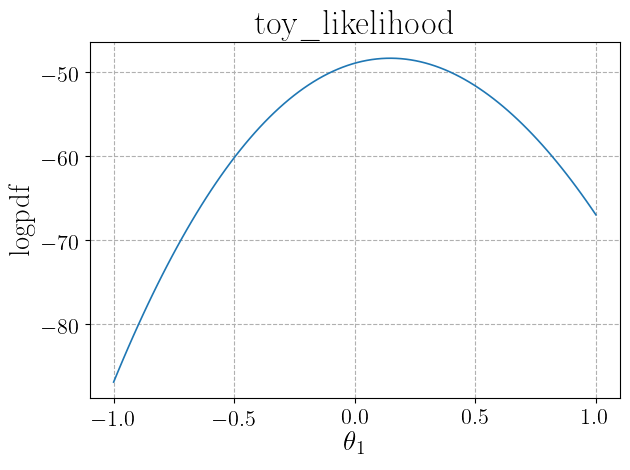

Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\toy_likelihood.log saved in 0.0007520999999997002 s.
Saved figure C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\toy_likelihood_figure_par_5.pdf.


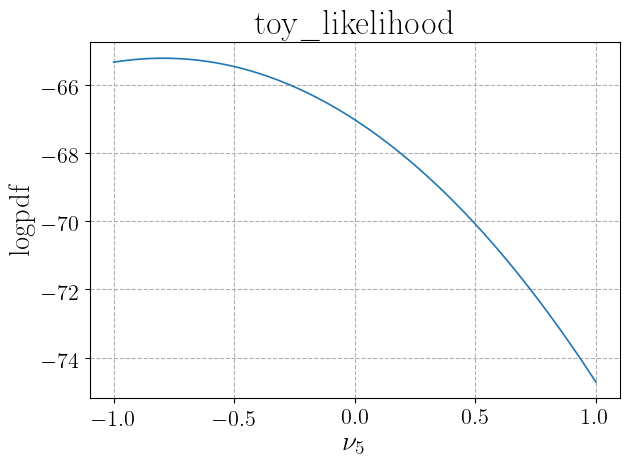

Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\toy_likelihood.log saved in 0.0008248999999977968 s.


In [21]:
likelihood.plot_logpdf_par([[0,-1,1],[5,-1,1]],overwrite=True)

In [22]:
likelihood.compute_maximum_logpdf()
print(likelihood.X_logpdf_max)
print(likelihood.Y_logpdf_max)

Maximum likelihood computed in 0.0446119000000067 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\toy_likelihood.log saved in 0.0008112000000011221 s.
[ 0.07336518  0.13770998  0.37188637  0.29722917 -0.11885353  0.03827821
 -0.09778509 -0.39470254 -0.05635657 -0.04963832 -0.08637441]
46.951238972152446


In [23]:
likelihood.compute_profiled_maxima(pars=[0],pars_ranges=[[-1,1,10]],spacing="grid",verbose=2)
print(likelihood.X_prof_logpdf_max)
print(likelihood.Y_prof_logpdf_max)

FloatProgress(value=0.0, layout=Layout(height='14px', margin='-5px 0px -20px 0px', padding='0px', width='500px…

Total number of points: 10 .
Log-pdf values lie in the range [ 46.95735912460686 , 51.570203866318195 ]
10 local maxima computed in 0.32282820000000356 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\toy_likelihood.log saved in 0.0008557999999965205 s.
[[-1.          1.10834579  1.31730977  1.23774123  0.83576533  0.96495694
   0.8125936   0.49455945  0.76571686  0.68476719  0.46789085]
 [-0.77777778  0.91269213  1.12648358  1.04763503  0.64239136  0.77676006
   0.62703081  0.31223278  0.5961199   0.53146156  0.349481  ]
 [-0.55555556  0.71428538  0.93309895  0.85511905  0.44676971  0.58661686
   0.43988422  0.1288899   0.42610519  0.3787011   0.23290691]
 [-0.33333333  0.51311423  0.73715087  0.66020111  0.24893106  0.39456257
   0.25122411 -0.05536624  0.25578756  0.22660957  0.11825617]
 [-0.11111111  0.30914035  0.53861567  0.46288121  0.04890399  0.20064375
   0.06112319 -0.24042337  0.08528204  0.07531189  0.00558092]
 [ 0.

In [24]:
likelihood.save_likelihood(overwrite=True)

Likelihood pickle file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\toy_likelihood.pickle saved in 0.008526899999992565 s.
Likelihood json file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\toy_likelihood.json saved in 0.0017225999999936903 s.
Likelihood log file C:\Users\Admin\Dropbox\Work\09_Resources\Git\GitHub\DNNLikelihood\ATLAS\tutorials\toy_likelihood.log saved in 0.0009210000000052787 s.


## Sampler